# Individual Assignment 1

Name: De Meneghi, Aidan, aidan.demeneghi@ryerson.ca

This assignment extends the in-class exercise on simple linear regression analysis. You are allowed to use all resources you can find, including lecture slides, in-class examples, previous group assignments, LinkedIn training courses, and the internet.

You are **not allowed** to discuss this assignment with anyone other than the course instructor. This assignment is required to be your individual work. 

Completed assignment should be merged to the **main** branch in your GitHub repository using the same file names.

***
## Data Description

The data set is contained in a comma-separated value (csv) file named ```CDN_hprice.csv``` with column headers. 

The data is a set of quarterly observations on a housing price index and other relevant variables in Canada for 1976 through 2019.

This data set is obtained from [Federal Reserve Bank of Dallas's International House Price Database](https://www.dallasfed.org/institute/houseprice).

Description of the data is as follow:

| Variable name | Variable description |
| -- | ----------- |
| Year      | Year |
| Quarter   | Quarter |
| RHPI      | House Price Index (real) |
| RPDI      | Personal disposable income in thousands (real) |
| logRHPI   | log(RHPI)   |
| logRPDI   | log(RPDI)   |
| UE        | Unemployment rate (in percentage points) |
| CPI       | Consumer Price Index |
| TB10_rt   | 10-year treasury bond rate (nominal) |
| RTB10_rt  | 10-year Treasury Bond rate (real) |


***
## Load the required modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot

***
## Question 1: Import the data set

#### 1.1 Load the data set into Python (10 points)

In [2]:
hp_data = pd.read_csv("CDN_hprice.csv")

#### 1.2 Check if the data is properly imported using the ```head()``` function (10 points)

In [7]:
hp_data.head()

,Year,Quarter,RHPI,RPDI,RTB10_rt,CPI,TB10_rt,UE,logRHPI,logRPDI
0,1976,Q1,58.98,74.11,0.835,24.414,9.327,6.867,4.0772,4.3056
1,1976,Q2,59.81,75.93,2.535,24.783,9.270,7.167,4.0912,4.3298
2,1976,Q3,58.82,73.23,2.885,25.125,8.937,7.367,4.0745,4.2936
3,1976,Q4,57.63,75.18,1.919,25.652,8.610,7.733,4.0540,4.3199
4,1977,Q1,55.78,74.07,0.943,26.310,8.783,7.867,4.0214,4.3050


***
## Question 2: Descriptive statistics

#### 2.1 Get statistical moments (10 points)

In [8]:
hp_data.describe()

,Year,RHPI,RPDI,RTB10_rt,CPI,TB10_rt,UE,logRHPI,logRPDI
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1997.500000,95.144034,95.916136,2.975716,71.159528,6.654256,8.159466,4.485711,4.547288
std,12.734655,38.013013,17.724510,2.400500,23.105191,3.754641,1.694782,0.363170,0.178373
min,1976.000000,54.450000,73.230000,-0.596000,24.414000,1.060000,5.567000,3.997300,4.293600
25%,1986.750000,69.810000,81.595000,0.856750,53.720000,3.454500,7.000000,4.245750,4.401800
50%,1997.500000,75.670000,88.965000,2.634500,71.991000,5.978500,7.667000,4.326400,4.488250
75%,2008.250000,124.450000,111.535000,4.636000,90.545250,9.500750,9.333250,4.823875,4.714325
max,2019.000000,191.800000,133.570000,9.135000,108.191000,16.447000,12.933000,5.256500,4.894600


#### 2.2 What is the sample mean for the unemployment rate and the real personal disposable income? (5 points)

8.16% and 95.92%

#### 2.3 Create a scatter plot to visualize the relationship between the real personal disposable income (RPDI) and the real house price index (RHPI) (10 points)
You should plot RPDI on the x-axis and RHPI on the y-axis

<AxesSubplot:xlabel='RPDI', ylabel='RHPI'>

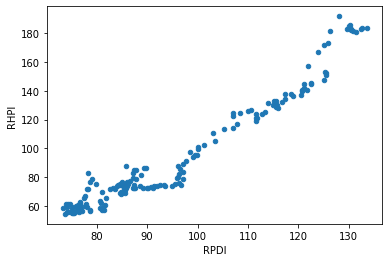

In [13]:
hp_data.plot.scatter('RPDI','RHPI')

#### 2.4 Judging from the scatterplot, what is the correlation between RHPI and RPDI? (5 point)

Positive

***
## Question 3: Simple Linear Regression Model

Consider a house price model with the real personal disposable income as the explanatory variable:
$$\textit{RHPI} = \beta_0 + \beta_1 \text{RPDI} + u,$$
where $RHPI$ is the real house price index, $RPDI$ is the real personal disposable income, and $u$ is the error term.

#### 3.1 Estimate the model (10 points)

In [10]:
model = smf.ols(formula = 'RHPI ~ 1 + RPDI', data = hp_data).fit()


#### 3.2 Get the estimation results (10 points)

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RHPI   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2833.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          1.34e-109
Time:                        17:58:13   Log-Likelihood:                -638.74
No. Observations:                 176   AIC:                             1281.
Df Residuals:                     174   BIC:                             1288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -104.5226      3.815    -27.401      0.000    -112.051     -96.994
RPDI           2.0817      0.039     53.224      0.000       2.004       2.159
==============================================================================
Omnibus:                        5.047   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.605
Skew:                           0.358   Prob(JB):                        0.100
Kurtosis:                       3.339   Cond. No.                         538.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.3 What percentage of the variation in RHPI is explained by RPDI? (10 points)

94.2%

#### 3.4 How would you interpret $\beta_1$? Be careful on the unit of measurement for the $x$ and $y$ variables. (10 points)

If your RPDI increases by 1 unit, the RHFI decreases by 2.0817 thousands.

#### 3.5 It is not meaningful to discuss the relationship between RHPI and RPDI, because RHPI is just an index value. (10 points)
Suggest how you can rewrite the model to estimate the relationship between the real house price *growth* and the level of real personal dispoable income.

By subtracting the base value from the index value, it will then also have a 0 base value like thr growth rate. It produces a more accurate model of house price growth and RPDI.

***
## References
- Jeffrey M. Wooldridge (2012). "Introductory Econometrics: A Modern Approach, 5e" Chapter 2.
    
- Seabold, Skipper, and Josef Perktold (2010). "[statsmodels: Econometric and statistical modeling with python](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)." Proceedings of the 9th Python in Science Conference.